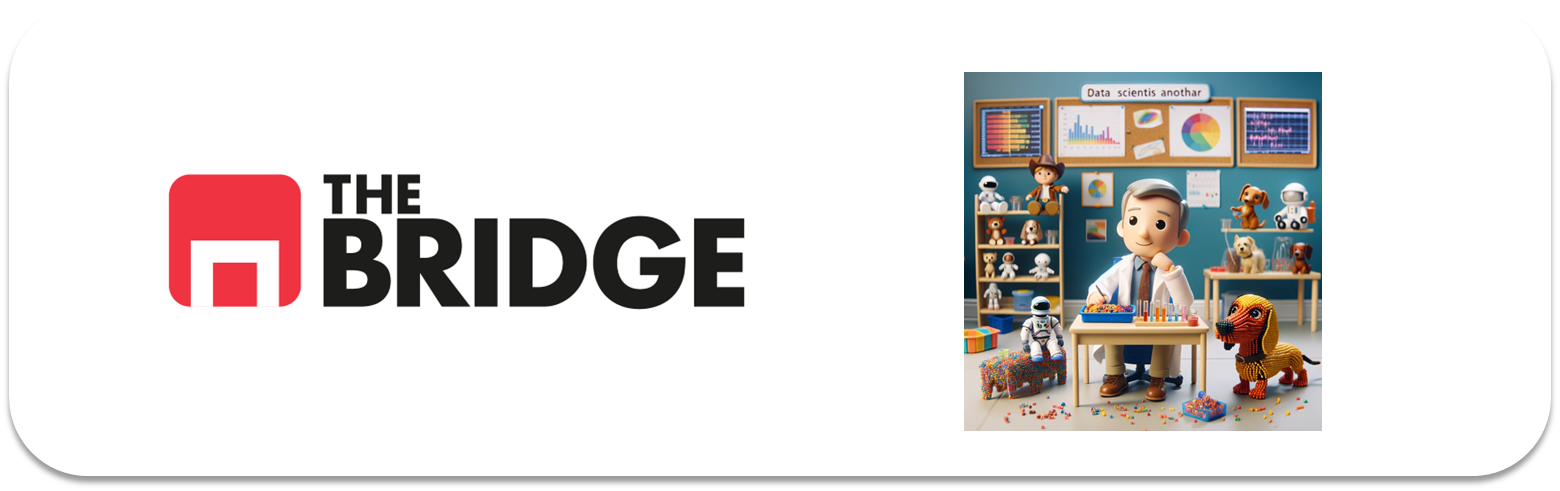

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns




In [ ]:
# Datensatz laden
df = pd.read_csv('path_zum_titanic_datensatz.csv')

# Die ersten Zeilen anzeigen, um einen Überblick zu bekommen
df.head()


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [3]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df_titanic = sns.load_dataset("titanic")

df_titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [8]:
df_titanic.sample(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
598,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
336,0,1,male,29.0,1,0,66.6000,S,First,man,True,C,Southampton,no,False
197,0,3,male,42.0,0,1,8.4042,S,Third,man,True,NaN,Southampton,no,False
770,0,3,male,24.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
837,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
97,1,1,male,23.0,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
833,0,3,male,23.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
764,0,3,male,16.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
315,1,3,female,26.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,yes,True
209,1,1,male,40.0,0,0,31.0000,C,First,man,True,A,Cherbourg,yes,True


In [7]:
print(df_titanic.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [9]:
missing_percentage = (df_titanic.isnull().sum() / len(df_titanic)) * 100
print(missing_percentage)


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [10]:
df_titanic_copy = df_titanic.copy()


In [11]:
# Spalte "deck" entfernen, da sie sehr viele Nullwerte enthält
df_titanic_copy = df_titanic_copy.drop(columns=['deck'])

df_titanic_copy['age'] = df_titanic_copy['age'].fillna(df_titanic_copy['age'].mean()) #auffüllen mit Mittelwert
df_titanic_copy['embarked'] = df_titanic_copy['embarked'].fillna(df_titanic_copy['embarked'].mode()[0]) #auffüllen mit dem häufigsten Wert
df_titanic_copy['embark_town'] = df_titanic_copy['embark_town'].fillna(df_titanic_copy['embark_town'].mode()[0]) # s.o.

#optinal : df_titanic_copy = df_titanic_copy.drop(columns=['parch']) # parch entfernen, da sie nicht benötigt wird, da sibsp ähnliche Infos hat


In [14]:
print(df_titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [13]:
print(df_titanic_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None


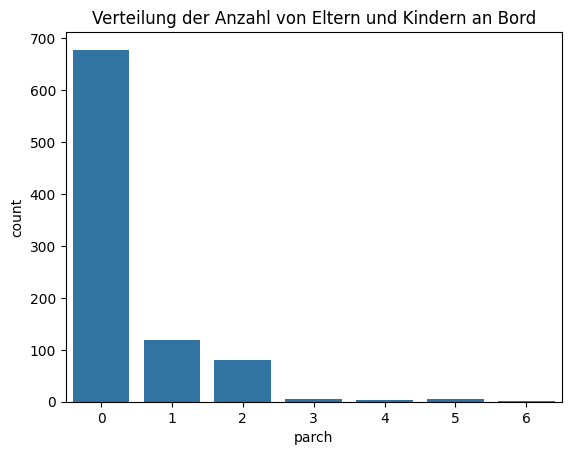

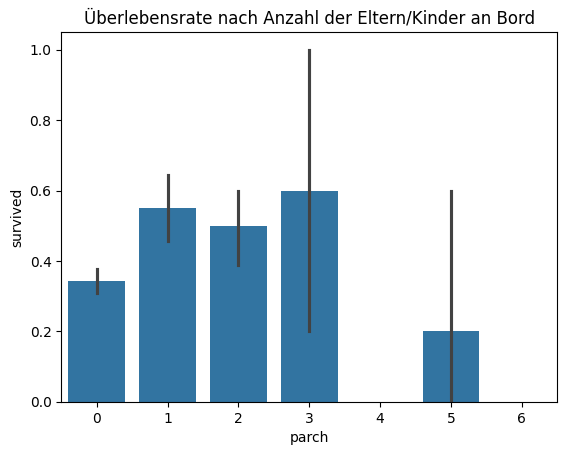

In [15]:
# Verteilung der `parch`-Spalte visualisieren
sns.countplot(data=df_titanic, x='parch')
plt.title('Verteilung der Anzahl von Eltern und Kindern an Bord')
plt.show()

# Zusammenhang mit dem Überleben untersuchen
sns.barplot(data=df_titanic, x='parch', y='survived')
plt.title('Überlebensrate nach Anzahl der Eltern/Kinder an Bord')
plt.show()


1.Tabelle:

Die Mehrheit der Passagiere reiste allein oder ohne Eltern/Kinder.
Das Vorhandensein von größeren Familiengruppen war selten.

2.Tabelle:

Beobachtungen:
Passagiere ***ohne*** Eltern/Kinder (parch = 0) hatten die **niedrigste** Überlebensrate.
Die Überlebensrate steigt bei 1 oder 2 Eltern/Kinder.
Personen mit 3 Eltern/Kinder haben die höchste Überlebensrate, obwohl hier Unsicherheit besteht (die Fehlerbalken sind groß, was auf wenige Datenpunkte hinweist).
Passagiere mit 5 oder mehr Eltern/Kinder hatten wieder eine niedrigere Überlebensrate.

Zusammenfassung der Erkenntnisse
Die Mehrheit der Passagiere war allein unterwegs (parch = 0).
Kleine Familien (1–3 Eltern/Kinder) hatten einen Vorteil beim Überleben.
Größere Familien könnten eher Opfer von chaotischen Evakuierungen geworden sein.

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



| **Columna/Variable** | **Descripción**                                                                 |
|-----------------------|--------------------------------------------------------------------------------|
| `survived`            | Indica si la persona sobrevivió (0 = no sobrevivió, 1 = sobrevivió).           |
| `pclass`              | Clase del pasajero (1 = primera clase, 2 = segunda clase, 3 = tercera clase).  |
| `sex`                 | Género de la persona (`male` = hombre, `female` = mujer).                      |
| `age`                 | Edad de la persona en años. Los valores faltantes fueron completados por la media.          |
| `sibsp`               | Número de hermanos/as o cónyuge que viajan con la persona.                     |
| `parch`               | Número de padres o hijos que viajan con la persona.                           |
| `fare`                | Precio del boleto que pagó la persona.                                        |
| `embarked`            | Puerto donde la persona subió al barco (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton). |
| `embark_town`         | Ciudad donde la persona subió al barco. Los valores faltantes fueron completados por los mas frecuentes. |
| `class`               | Clase del pasajero en formato de texto (First, Second, Third).                 |
| `who`                 | Agrupación de la persona (`man` = hombre, `woman` = mujer, `child` = niño).    |
| `adult_male`          | Indica si la persona es un hombre adulto (True/False).                        |
| `alive`               | Indica si la persona sobrevivió (`yes` = sobrevivió, `no` = no sobrevivió).   |
| `alone`               | Indica si la persona viajó sola (True/False).                                 |


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [ ]:
df_titanic_copy['embarked'] = df_titanic_copy['embarked'].replace({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})                                          # Initialen in Spalte 'embarked' durch Städtenamen ersetzen

print(df_titanic_copy['embarked'].unique())


['Southampton' 'Cherbourg' 'Queenstown']


In [ ]:
df_titanic_copy['embark_town'] = df_titanic_copy['embark_town'].replace({
    'Southampton': 'Southampton',
    'Cherbourg': 'Cherbourg',
    'Queenstown': 'Queenstown'
})                                                        # Prüfen, ob in 'embark_town' Namen richtig sind

print(df_titanic_copy['embark_town'].unique())


['Southampton' 'Cherbourg' 'Queenstown']


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

survived
0    549
1    342
Name: count, dtype: int64


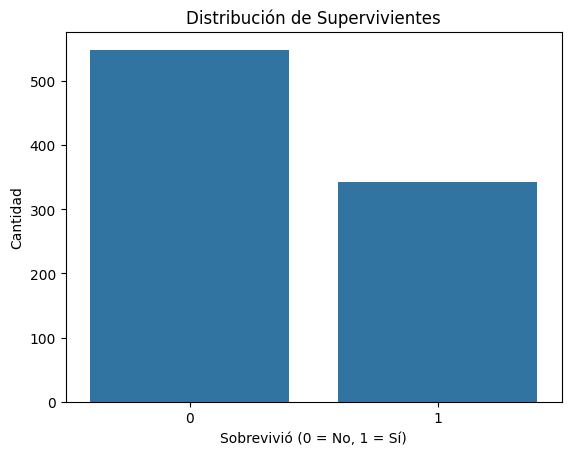

In [25]:
print(df_titanic_copy['survived'].value_counts())

sns.countplot(data=df_titanic_copy, x='survived')
plt.title('Distribución de Supervivientes')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()


who
man      537
woman    271
child     83
Name: count, dtype: int64


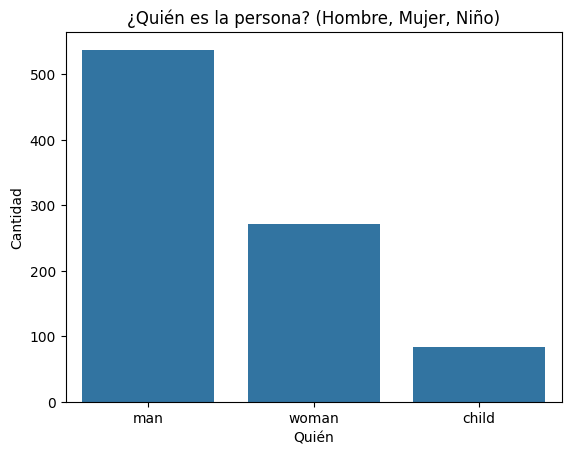

In [26]:
print(df_titanic_copy['who'].value_counts())

sns.countplot(data=df_titanic_copy, x='who')
plt.title('¿Quién es la persona? (Hombre, Mujer, Niño)')
plt.xlabel('Quién')
plt.ylabel('Cantidad')
plt.show()



class
Third     491
First     216
Second    184
Name: count, dtype: int64


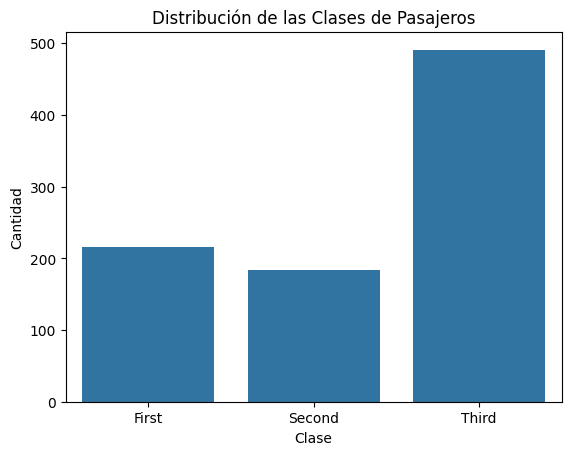

In [27]:
print(df_titanic_copy['class'].value_counts())

sns.countplot(data=df_titanic_copy, x='class', order=['First', 'Second', 'Third'])
plt.title('Distribución de las Clases de Pasajeros')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()



embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


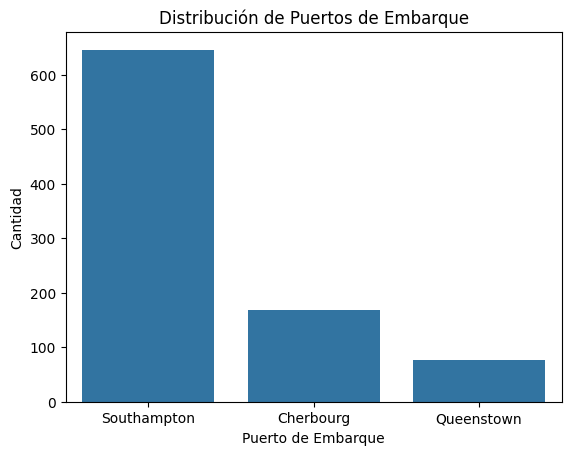

In [29]:
print(df_titanic_copy['embarked'].value_counts())

sns.countplot(data=df_titanic_copy, x='embarked', order=['Southampton', 'Cherbourg', 'Queenstown'])
plt.title('Distribución de Puertos de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Cantidad')
plt.show()



alone
True     537
False    354
Name: count, dtype: int64


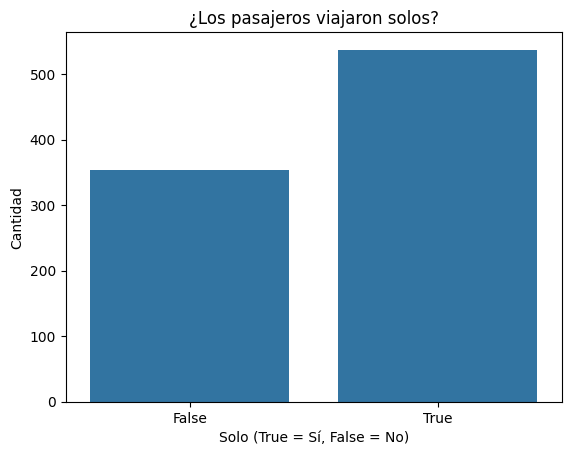

In [30]:
print(df_titanic_copy['alone'].value_counts())

sns.countplot(data=df_titanic_copy, x='alone')
plt.title('¿Los pasajeros viajaron solos?')
plt.xlabel('Solo (True = Sí, False = No)')
plt.ylabel('Cantidad')
plt.show()



### #2.2 Numéricas

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: age, dtype: float64


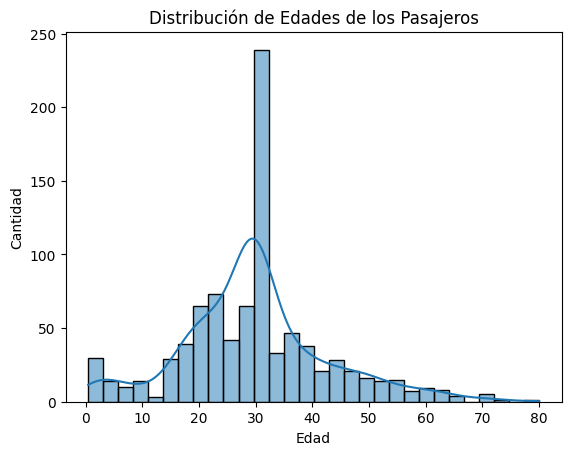

In [31]:
print(df_titanic_copy['age'].describe())

sns.histplot(df_titanic_copy['age'], kde=True)
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()



count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


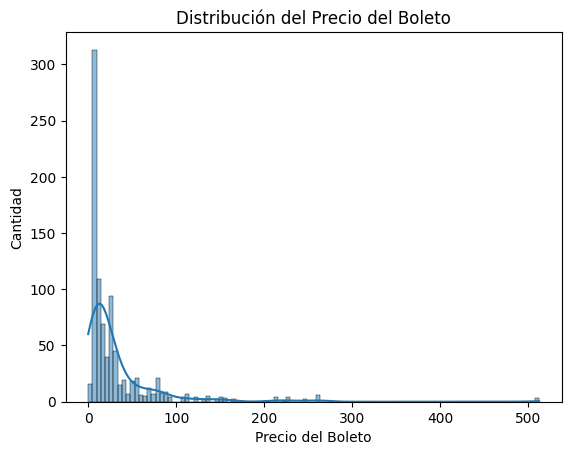

In [32]:
print(df_titanic_copy['fare'].describe())

sns.histplot(df_titanic_copy['fare'], kde=True)
plt.title('Distribución del Precio del Boleto')
plt.xlabel('Precio del Boleto')
plt.ylabel('Cantidad')
plt.show()



**Categóricas:**

En survived: La ***mayoría*** de los pasajeros ***no*** sobrevivió.
En class: La ***mayoría*** de los pasajeros estaban en ***tercera*** clase.
En embarked: La ***mayoría*** de los pasajeros embarcaron en ***Southampton***.

**Numéricas:**

En age: La ***mayoría*** de los pasajeros tenían entre ***20 y 40*** años.
En fare: La ***mayoría*** de los pasajeros pagaron ***precios bajos*** por sus boletos, pero hubo algunos outliers altos.

**Analisis** de variables **categoricas**: 'survived', 'class', 'embarked', 'who', 'alone' con frecuencia relativa e absoluta.

In [40]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, errorbar=None)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, errorbar=None)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()




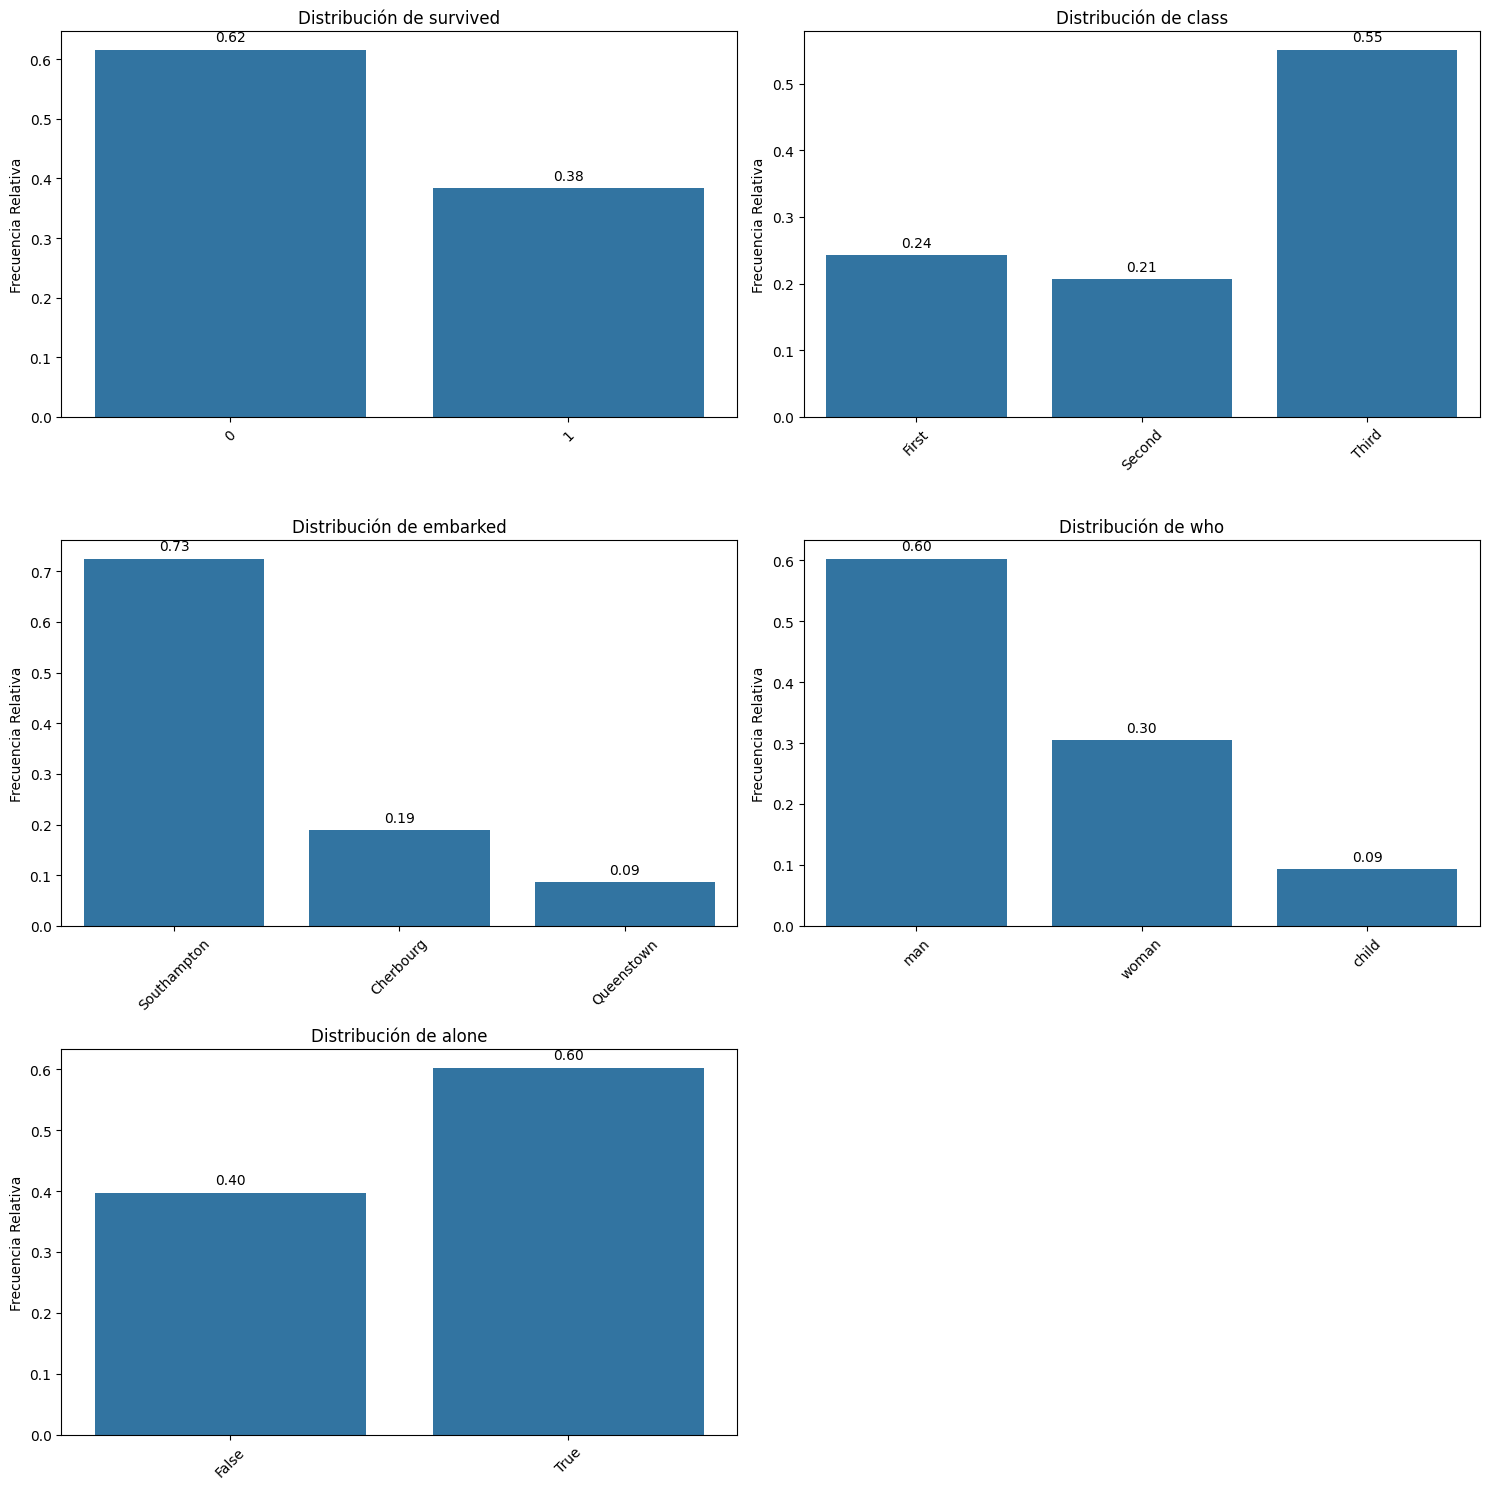

In [ ]:
columnas_categoricas = ['survived', 'class', 'embarked', 'who', 'alone']
pinta_distribucion_categoricas(df_titanic_copy, columnas_categoricas, relativa=True, mostrar_valores=True) #relative Häufigkeit


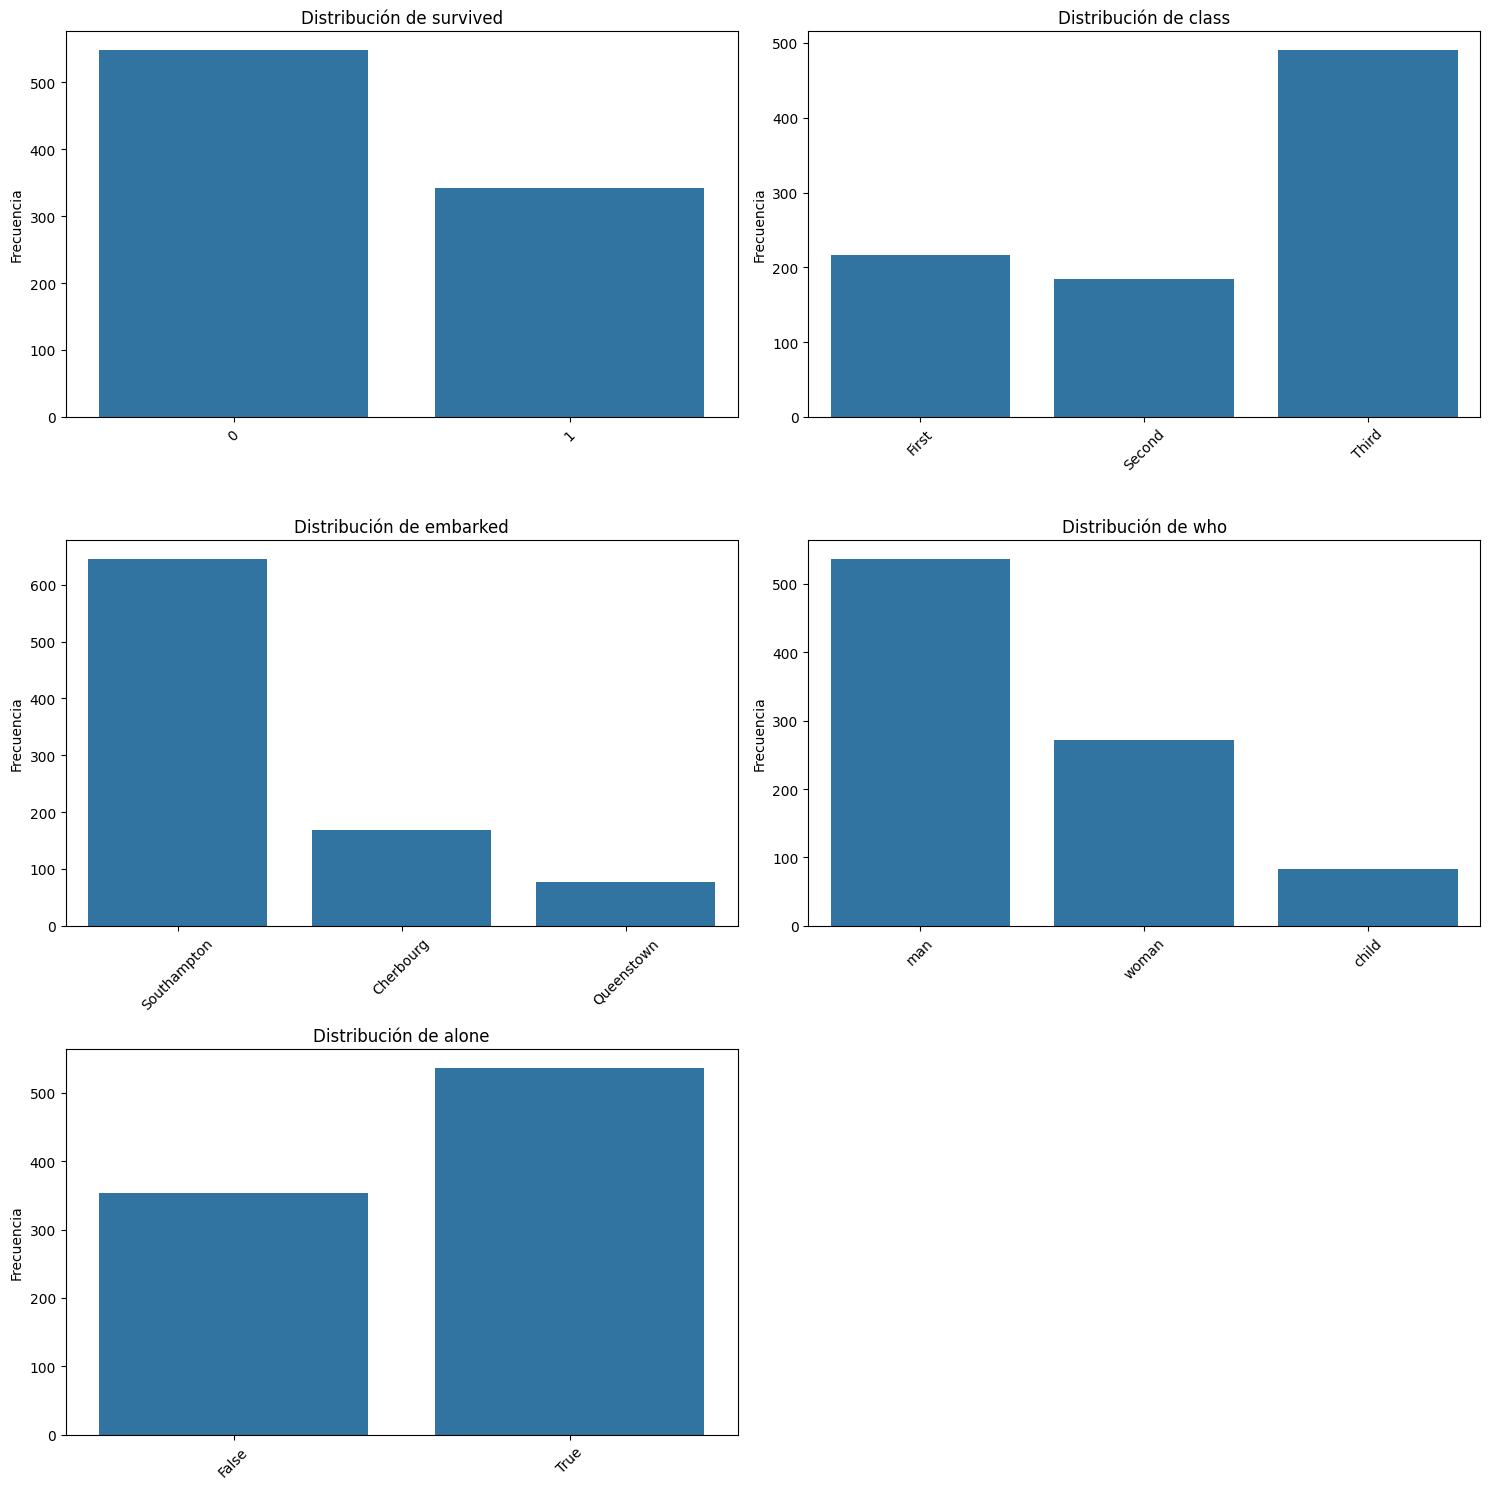

In [ ]:
columnas_categoricas = ['survived', 'class', 'embarked', 'who', 'alone'] 
pinta_distribucion_categoricas(df_titanic_copy, columnas_categoricas)  #absolute Häufigkeit


**Analisis** de variables numericas **"age"** and **"fare"**

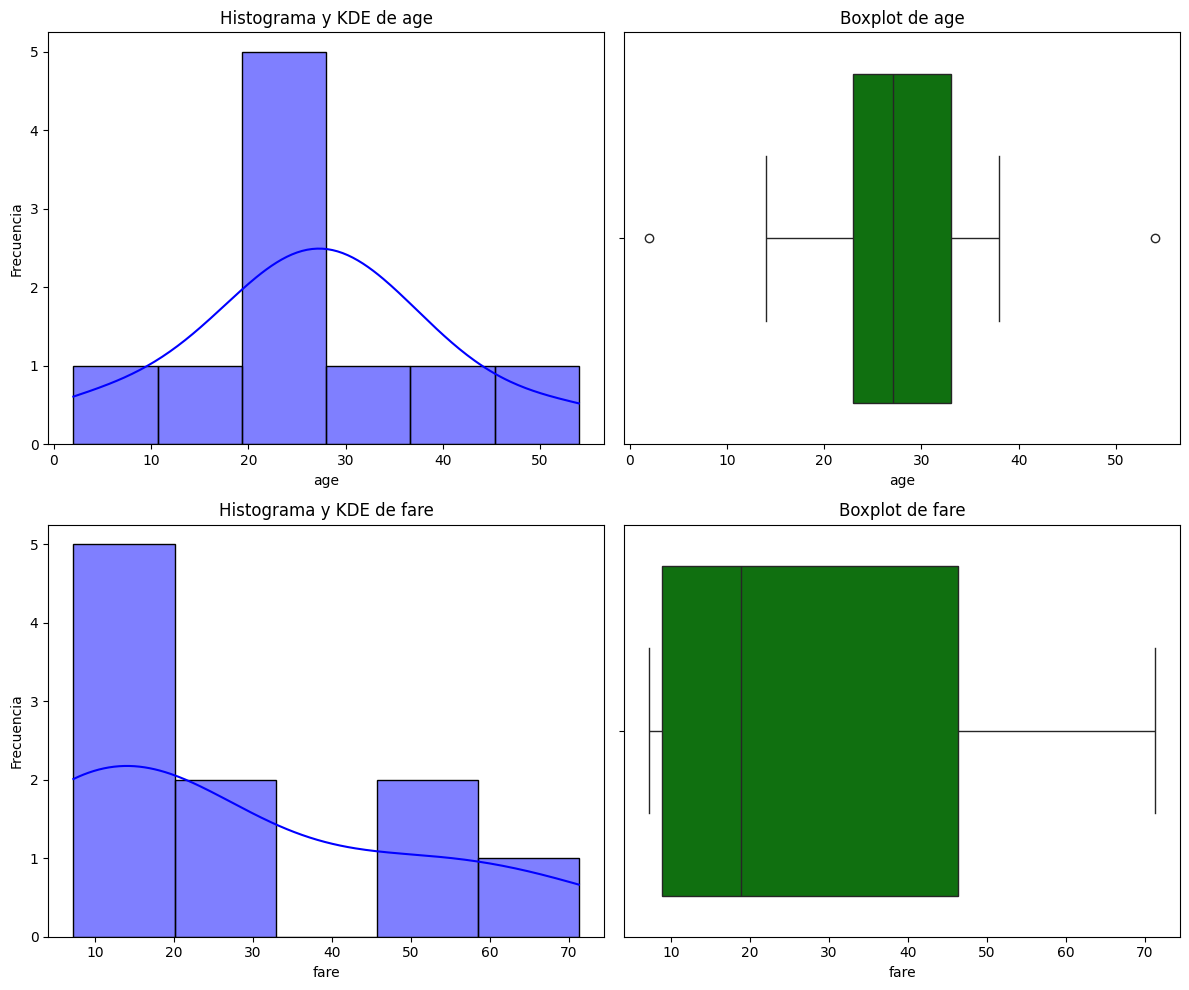

In [ ]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols > 0:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        if num_cols == 1:
            axes = [axes]  # Sicherstellen, dass axes immer eine Liste ist

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histogramm und KDE
                sns.histplot(df[column], kde=True, ax=axes[i][0], color='blue')
                axes[i][0].set_title(f'Histograma y KDE de {column}')
                axes[i][0].set_xlabel(column)
                axes[i][0].set_ylabel('Frecuencia')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i][1], whis=whisker_width, color='green')
                axes[i][1].set_title(f'Boxplot de {column}')
                axes[i][1].set_xlabel(column)

        plt.tight_layout()
        plt.show()

# Numerische Variablen analysieren: age und fare
numerical_columns = ['age', 'fare']

plot_combined_graphs(df_titanic_copy, numerical_columns)


1. **Edad (age)**
Histograma y KDE:
La mayoría de los pasajeros tienen entre 20 y 40 años.
Hay pocos pasajeros jóvenes (menos de 10 años) y algunos mayores (más de 50 años).

Boxplot:
La mediana de edad está en 27 años.
Existen valores atípicos en ambas direcciones:
Niños muy jóvenes.
Pasajeros de mayor edad.


2. **Precio del boleto (fare)**
Histograma y KDE:
La distribución es asimétrica: la mayoría de los pasajeros pagaron menos de 20 por sus boletos.
Algunos pasajeros pagaron boletos significativamente más caros, lo que indica probablemente cabinas de lujo en clases altas.

Boxplot:
La mediana del precio del boleto está alrededor de 30.
Se observan valores atípicos con precios muy altos, correspondientes a boletos de primera clase o suites exclusivas.
